<a href="https://colab.research.google.com/github/dschirmerii/fintechbootcamp-Project_2/blob/main/ResNet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

Fri Aug  6 17:44:16 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.42.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P0    28W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('To enable a high-RAM runtime, select the Runtime > "Change runtime type"')
  print('menu, and then select High-RAM in the Runtime shape dropdown. Then, ')
  print('re-execute this cell.')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 27.3 gigabytes of available RAM

You are using a high-RAM runtime!


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
! pip install split-folders

In [5]:
!pip install q keras==1.2.2

In [6]:
# importing libaries
import pandas as pd
import splitfolders
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Convolution2D, MaxPooling2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import tensorflow as tf
import os
import numpy as np
import shutil
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img

Using TensorFlow backend.


In [7]:
cd /content/drive/MyDrive/Project 2

/content/drive/MyDrive/Project 2


In [8]:
trdata = ImageDataGenerator()
traindata = trdata.flow_from_directory(directory="./output/train",target_size=(224,224))
vldata=ImageDataGenerator()
valdata=vldata.flow_from_directory(directory="./output/val", target_size=(224,224))

Found 799 images belonging to 2 classes.
Found 201 images belonging to 2 classes.


In [9]:
Traindata = ImageDataGenerator( preprocessing_function=tf.keras.applications.resnet.preprocess_input)
Valdata = ImageDataGenerator( preprocessing_function=tf.keras.applications.resnet.preprocess_input)

In [10]:
# Import the base model
from tensorflow.keras.applications import ResNet50

model = ResNet50(input_shape=(224, 224,3), include_top=False)

In [11]:
from tensorflow.keras.applications import ResNet50
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D, Dropout, BatchNormalization
from tensorflow.keras.initializers import RandomNormal, Constant

In [12]:
Conv_Base = ResNet50(include_top = False, input_shape = (224,224, 3),weights='imagenet')

In [13]:
Conv_Base.trainable = False

In [14]:
# Build and compile the Model 


model = Sequential()
model.add(Conv_Base)
BatchNormalization()
model.add(Flatten())
model.add(Dense(units = 256, activation = 'relu'))
BatchNormalization(
        momentum=0.95, 
        epsilon=0.005,
        beta_initializer=RandomNormal(mean=0.0, stddev=0.05), 
        gamma_initializer=Constant(value=0.9)
    )
# model.add(Dropout(0.2))
model.add(Dense(units = 1, activation = 'softmax'))

In [15]:
metric = tf.keras.metrics.binary_accuracy

In [16]:
# Compile the model
model.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics =metric)

In [17]:
# Fiting the Model
resnet_history = model.fit(traindata,batch_size=32,steps_per_epoch=25, validation_data=valdata, validation_steps=6,epochs=50)

Epoch 1/50
25/25 [==============================] - 452s 18s/step - loss: 6.0730 - binary_accuracy: 0.5000 - val_loss: 0.7387 - val_binary_accuracy: 0.5000
Epoch 2/50
25/25 [==============================] - 22s 930ms/step - loss: 0.7903 - binary_accuracy: 0.5000 - val_loss: 0.7995 - val_binary_accuracy: 0.5000
Epoch 3/50
25/25 [==============================] - 22s 922ms/step - loss: 0.7452 - binary_accuracy: 0.5000 - val_loss: 0.7156 - val_binary_accuracy: 0.5000
Epoch 4/50
25/25 [==============================] - 22s 927ms/step - loss: 0.7134 - binary_accuracy: 0.5000 - val_loss: 0.7057 - val_binary_accuracy: 0.5000
Epoch 5/50
25/25 [==============================] - 22s 918ms/step - loss: 0.7069 - binary_accuracy: 0.5000 - val_loss: 0.7051 - val_binary_accuracy: 0.5000
Epoch 6/50
25/25 [==============================] - 22s 914ms/step - loss: 0.7049 - binary_accuracy: 0.5000 - val_loss: 0.7138 - val_binary_accuracy: 0.5000
Epoch 7/50
25/25 [==============================] - 22s 922

In [21]:
epochs=50

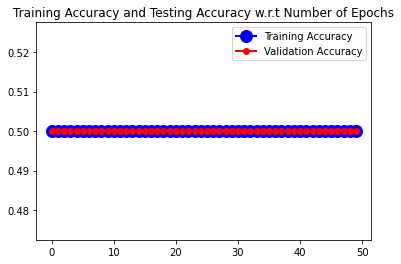

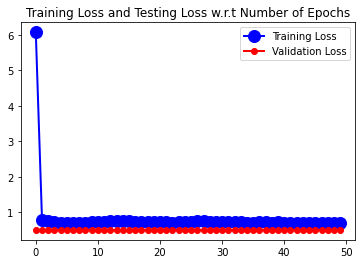

In [24]:
train_acc = resnet_history.history['binary_accuracy']
val_acc = resnet_history.history['val_binary_accuracy']
train_loss = resnet_history.history['loss']
val_loss = resnet_history.history['val_loss']
No_Of_Epochs = range(epochs)

plt.plot(No_Of_Epochs, train_acc, marker = 'o', color = 'blue', markersize = 12, 
                 linewidth = 2, label = 'Training Accuracy')
plt.plot(No_Of_Epochs, val_acc, marker = '.', color = 'red', markersize = 12, 
                 linewidth = 2, label = 'Validation Accuracy')

plt.title('Training Accuracy and Testing Accuracy w.r.t Number of Epochs')

plt.legend()

plt.figure()

plt.plot(No_Of_Epochs, train_loss, marker = 'o', color = 'blue', markersize = 12, 
                 linewidth = 2, label = 'Training Loss')
plt.plot(No_Of_Epochs, val_acc, marker = '.', color = 'red', markersize = 12, 
                 linewidth = 2, label = 'Validation Loss')

plt.title('Training Loss and Testing Loss w.r.t Number of Epochs')

plt.legend()

